                                  Null Count
Feature                                     
MINIMUM_PAYMENTS                         313
CREDIT_LIMIT                               1
TENURE                                     0
PURCHASES_FREQUENCY                        0
BALANCE                                    0
BALANCE_FREQUENCY                          0
PURCHASES                                  0
ONEOFF_PURCHASES                           0
INSTALLMENTS_PURCHASES                     0
CASH_ADVANCE                               0
ONEOFF_PURCHASES_FREQUENCY                 0
PRC_FULL_PAYMENT                           0
PURCHASES_INSTALLMENTS_FREQUENCY           0
CASH_ADVANCE_FREQUENCY                     0
CASH_ADVANCE_TRX                           0
PURCHASES_TRX                              0
PAYMENTS                                   0
CUST_ID                                    0


393060974446.5349
279296567206.891
232802790206.94107
206553461523.41586
182427559015.364
16169162

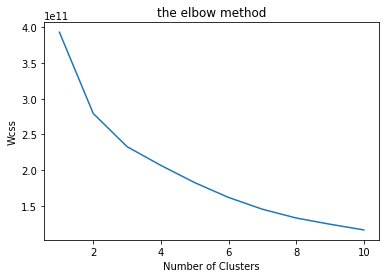

In [8]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

data_frame = pd.read_csv('./CC.csv')

#find out null values

nulls = pd.DataFrame(data_frame.isnull().sum().sort_values(ascending=False))
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
print(nulls)
print("\n")

#remove null values
data_frame.loc[(data_frame.MINIMUM_PAYMENTS.isnull()==True),'MINIMUM_PAYMENTS']=data_frame.MINIMUM_PAYMENTS.mean()
data_frame.loc[(data_frame.CREDIT_LIMIT.isnull()==True),'CREDIT_LIMIT']=data_frame.CREDIT_LIMIT.mean()

x = data_frame.iloc[:,1:-1]
y = data_frame.iloc[:-1]
wcss= []
for i in range(1,11):
    kmeans= KMeans(n_clusters=i,max_iter=300,random_state=0)
    kmeans.fit(x)
    print(kmeans.inertia_)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('the elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('Wcss')
plt.show()

In [4]:
#k means
k = KMeans(3)
k.fit(x)
preditction = k.predict(x)
score = metrics.silhouette_score(x, preditction)
print(score)

0.46765520284747175


In [5]:
#scaling
scaler = StandardScaler()

scaler.fit(x)
x_scaler = scaler.transform(x)
pca = PCA(3)
x_pca = pca.fit_transform(x_scaler)
df2 = pd.DataFrame(data=x_pca)

# finaldf = pd.concat([df2,data_frame[['TENURE']]],axis=1)

k1 = KMeans(3)
k1.fit(x_pca)
predic = k1.predict(x_pca)
scoreafterscale = metrics.silhouette_score(x_pca, predic)
print("score after applying SCALE+PCA: " + str(scoreafterscale))


score after applying SCALE+PCA: 0.3815653024361999


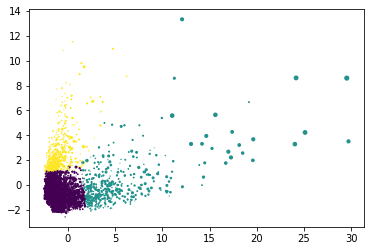

In [7]:
plt.scatter(x_pca[:, 0], x_pca[:, 1],x_pca[:, 2], c=predic)